# Categorical Plot

 It is good to divide categorical plot into three different families
 - Categorical scatterplots:
    - stripplot() (with kind="strip"; the default)
    - swarmplot() (with kind="swarm")
 - Categorical distribution plots:
    - boxplot() (with kind="box")
    - violinplot() (with kind="violin")
    boxenplot() (with kind="boxen")
 - Categorical estimate plots:
    - pointplot() (with kind="point")
    - barplot() (with kind="bar")
    - countplot() (with kind="count")

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
sb.set_theme(style="ticks",color_codes=True)

## Categorical scatterplots

The default representation of the data in catplot() uses a scatterplot. There are actually two different categorical scatter plots in seaborn. The approach used by stripplot(), which is the default “kind” in catplot() is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:

### sb.catplot()

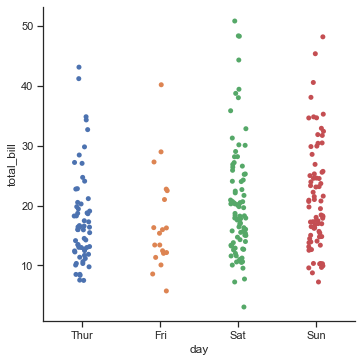

In [4]:
tips = sb.load_dataset("tips")
sb.catplot(x="day",y="total_bill",data=tips)

The jitter parameter controls the magnitude of jitter or disables it altogether:

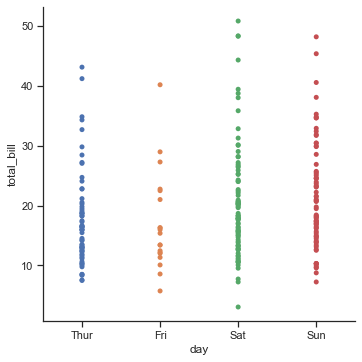

In [5]:
sb.catplot(x="day",y="total_bill",jitter = False,data=tips)

swarmplot() is activated using kind="swarm"

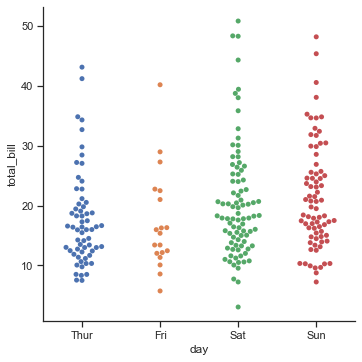

In [6]:
sb.catplot(x="day",y="total_bill",kind="swarm",data=tips)

it’s possible to add another dimension to a categorical plot by using a hue semantic.

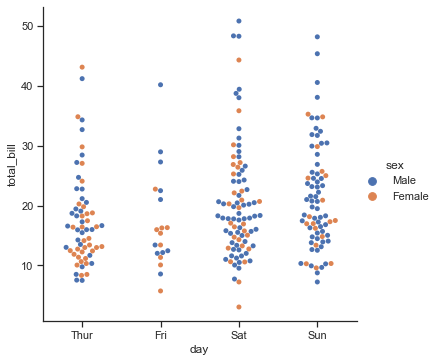

In [7]:
sb.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

The option for choosing a default ordering is to take the levels of the category as they appear in the dataset. The ordering can also be controlled on a plot-specific basis using the order parameter. This can be important when drawing multiple categorical plots in the same figure

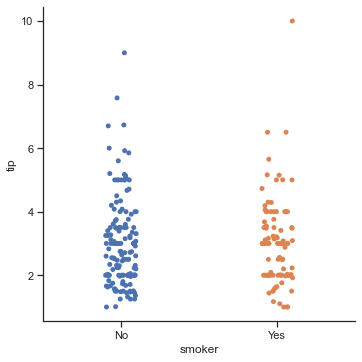

In [8]:
sb.catplot(x="smoker",y="tip",order=["No","Yes"],data=tips)

When the category names are relatively long. It’s often helpful to put the categorical variable on the vertical axis. To do this, swap the assignment of variables to axes:

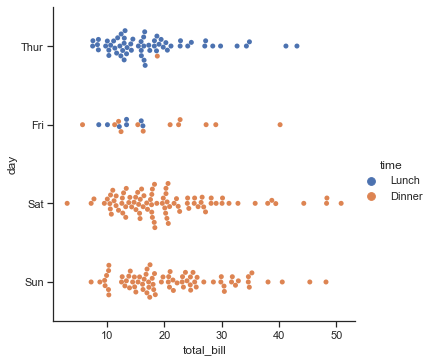

In [9]:
sb.catplot(x="total_bill",y="day",hue = "time",kind="swarm",data = tips)

## sb.swarmplot()
seaborn.swarmplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None,**kwargs*)
- A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

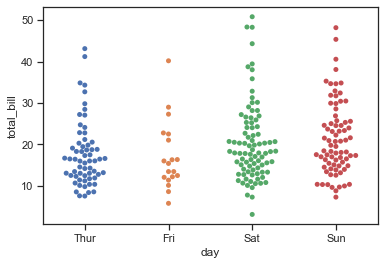

In [11]:
ax = sb.swarmplot(x="day", y="total_bill", data=tips)

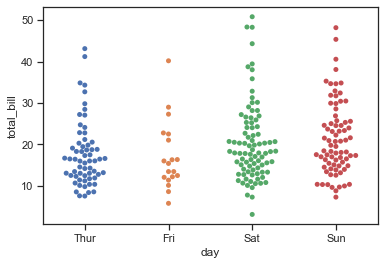

In [13]:
#Drawing horizontal swarm
ax = sb.swarmplot(x="day", y="total_bill", data=tips)

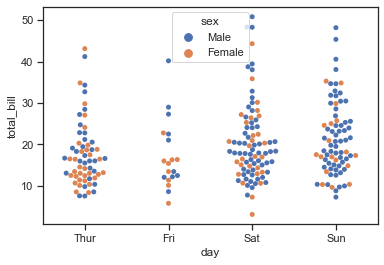

In [15]:
# Color the points using a second categorical variable:
ax = sb.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

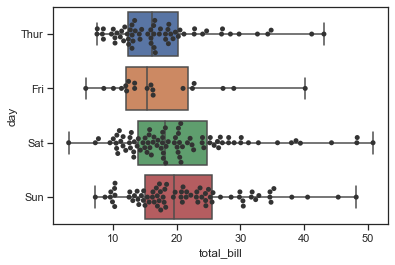

In [17]:
# Draw swarms of observations on top of a box plot:
ax = sb.boxplot(x="total_bill",y="day",data=tips,whis=np.inf)
ax = sb.swarmplot(x="total_bill",y="day",data=tips,color=".2")

## Categorical distribution plots

### Boxplots
seaborn.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs*)
- A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

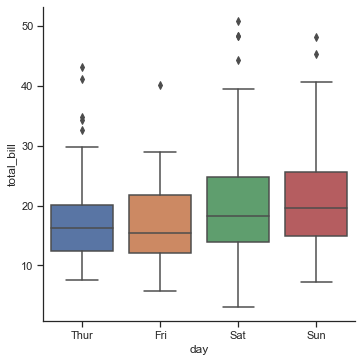

In [18]:
sb.catplot(x="day",y="total_bill",kind="box",data =tips)

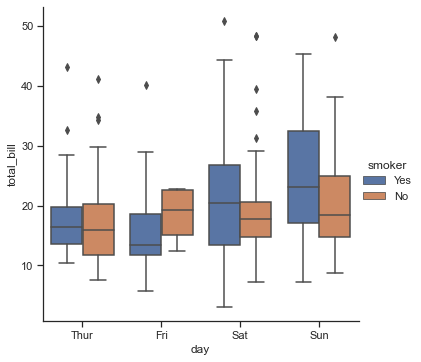

In [12]:
sb.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

### violinplot()
seaborn.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs*)
- violinplot() combines a boxplot with the kernel density estimation procedure described in the distributions tutorial.The quartile and whisker values from the boxplot are shown inside the violin

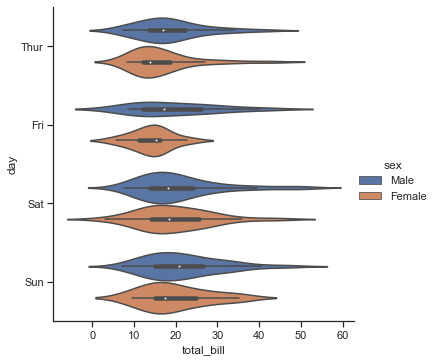

In [4]:
tips=sb.load_dataset("tips")
sb.catplot(x="total_bill",y="day",hue="sex",
          kind="violin",data=tips)

The violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

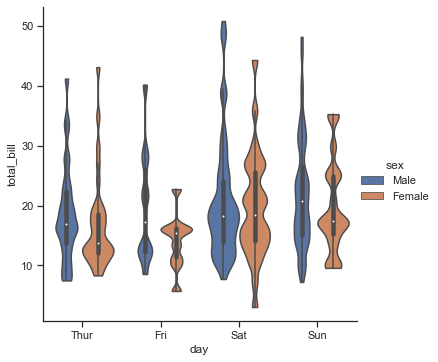

In [7]:
sb.catplot(x="day",y="total_bill",hue="sex",kind="violin",data=tips,bw=.15,cut=0)

it is also possible to "split" the violins when the hue parameter has only two levels, which can allow for a more efficient use of space

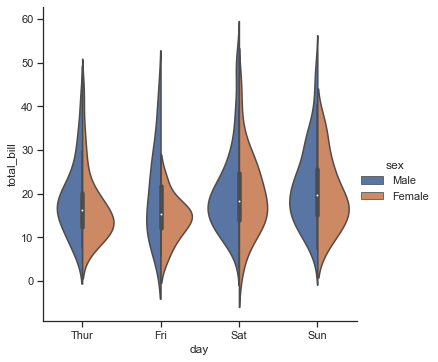

In [12]:
sb.catplot(x="day",y="total_bill",hue="sex",kind="violin",split=True,data=tips)

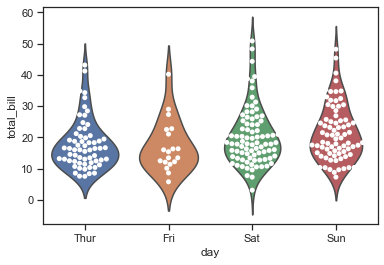

In [20]:
ax = sb.violinplot(x="day", y="total_bill", data=tips, inner=None)
ax = sb.swarmplot(x="day", y="total_bill", data=tips,
                   color="white", edgecolor="gray")

### Showing individual observation inside violin

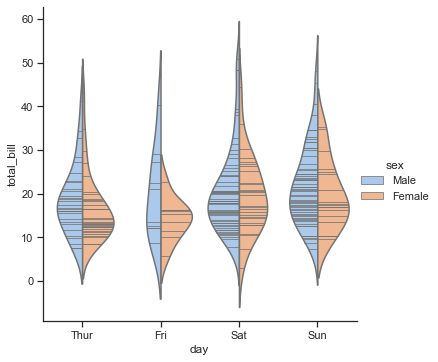

In [14]:
sb.catplot(x="day",y="total_bill",hue="sex",kind="violin",inner="stick",split=True,
          palette="pastel",data=tips)

It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution

<AxesSubplot:xlabel='day', ylabel='total_bill'>

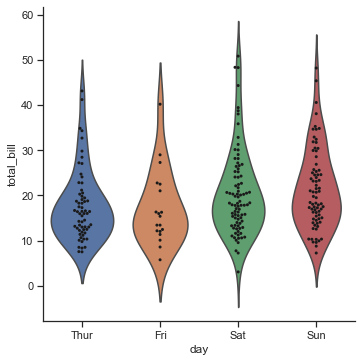

In [15]:
g=sb.catplot(x="day",y="total_bill",kind="violin",inner=None,data=tips)
sb.swarmplot(x="day",y="total_bill",color="k",size=3,data=tips,ax=g.ax)

## Statistical Estimation within Categories

### Bar Plots

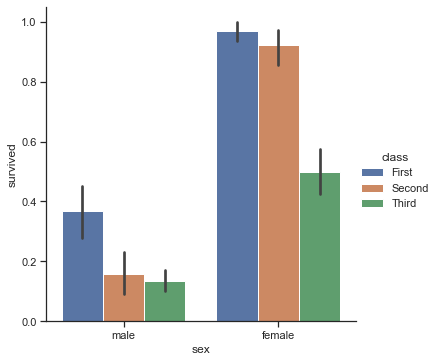

In [17]:
titanic = sb.load_dataset("titanic")
sb.catplot(x="sex",y="survived",hue="class",kind="bar",data=titanic)

To control the size and shape of plots made by the functions discussed, we must set up the figure ourself using matplotlib commands

<AxesSubplot:xlabel='count', ylabel='deck'>

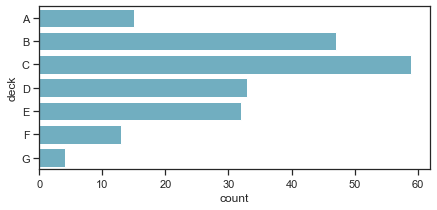

In [18]:
f,ax=plt.subplots(figsize=(7,3))
sb.countplot(y="deck",data=titanic,color='c')

## Showing multiple relationships with facets

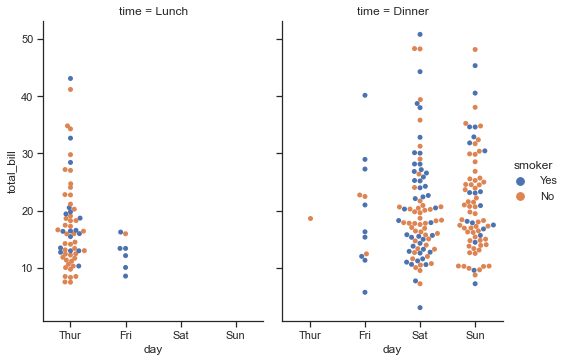

In [19]:
sb.catplot(x="day",y="total_bill",hue="smoker",col="time",aspect=.7,kind="swarm",data=tips)

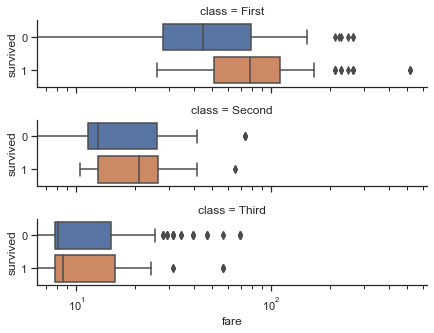

In [22]:
g = sb.catplot(x="fare",y="survived",row="class",kind="box",orient='h',height=1.5,aspect=4,data=titanic)
g.set(xscale='log')